In [2]:
import requests
import json
import pandas as pd

def get_posts(subreddit, before, after, size):
    url = f"https://api.pushshift.io/reddit/search/submission/?subreddit={subreddit}&size={size}&before={before}&after={after}"
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

# Scrape 2000 legal question titles
legal_questions = []
size = 100
after = "7d" # posts from the last 7 days
before = "" # no upper time limit
subreddit = "legaladvice"
while len(legal_questions) < 2000: # scrape until we have 2000 legal questions
    data = get_posts(subreddit, before, after, size)
    if not data: # if data is empty, break out of loop
        break
    for post in data:
        if post["title"].endswith("?"):
            legal_questions.append({"title": post["title"], "label": 1})
            if len(legal_questions) >= 2000: # break out of loop if we have 2000 legal questions
                break
    before = data[-1]["created_utc"] # set before time for next page

# Scrape 2000 non-legal question titles
non_legal_questions = []
size = 100
after = "7d" # posts from the last 7 days
before = "" # no upper time limit
subreddit = "askreddit"
while len(non_legal_questions) < 2000: # scrape until we have 2000 non-legal questions
    data = get_posts(subreddit, before, after, size)
    if not data: # if data is empty, break out of loop
        break
    for post in data:
        title = post["title"]
        if title.endswith("?") and "legal" not in title.lower() and "law" not in title.lower() and "court" not in title.lower():
            non_legal_questions.append({"title": title, "label": 0})
            if len(non_legal_questions) >= 2000: # break out of loop if we have 2000 non-legal questions
                break
    before = data[-1]["created_utc"] # set before time for next page

# Combine legal and non-legal questions into a single list and shuffle the order
questions = legal_questions + non_legal_questions
import random
random.shuffle(questions)

# Convert list of questions to a dataframe and save to a CSV file
df = pd.DataFrame(questions)
df.to_csv("questions.csv", index=False)


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# load questions data from CSV file
df = pd.read_csv('questions.csv')

# split data into training and testing sets
train_df = df[:1600]
test_df = df[1600:]

# vectorize training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']

# train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# function to classify user input
def classify_input(input_str):
    X = vectorizer.transform([input_str])
    y_pred = model.predict(X)
    return y_pred[0]

# example usage
input_str = input('Enter a question: ')
label = classify_input(input_str)
if label == 1:
    print('This is a legal question.')
else:
    print('This is not a legal question.')


Enter a question: who is Imran khan?
This is not a legal question.


In [3]:
from sklearn.linear_model import LogisticRegression

# load questions data from CSV file
df = pd.read_csv('questions.csv')

# split data into training and testing sets
train_df = df[:1600]
test_df = df[1600:]

# vectorize training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']

# train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# function to classify user input
def classify_input(input_str):
    X = vectorizer.transform([input_str])
    y_pred = model.predict(X)
    return y_pred[0]

# example usage
input_str = input('Enter a question: ')
label = classify_input(input_str)
if label == 1:
    print('This is a legal question.')
else:
    print('This is not a legal question.')


Enter a question: am I able to sue the police officer to break my car light?
This is a legal question.


In [6]:
# import necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

# load questions data from CSV file
df = pd.read_csv('questions.csv')

# split data into training and testing sets
train_df = df[:1600]
test_df = df[1600:]

# vectorize training and testing data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# train decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# evaluate model on test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")
print(f"Test set F1 score: {f1:.4f}")

# function to classify user input
def classify_input(input_str):
    X_input = vectorizer.transform([input_str])
    predicted_label = clf.predict(X_input)[0]
    return predicted_label

# example usage
input_str = input('Enter a question: ')
label = classify_input(input_str)
if label == 1:
    print('This is a legal question.')
else:
    print('This is not a legal question.')


Test set accuracy: 0.8612
Test set F1 score: 0.8081
Enter a question: am I able to sue the police officer to break my car light?
This is a legal question.


In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

# create a Bagging Decision Tree classifier
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                       n_estimators=10,
                                       random_state=42)

# vectorize training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']

# train the classifier
bagging_classifier.fit(X_train, y_train)

# take input from the user
user_input = input("Enter your question: ")

# vectorize the user input
X_user = vectorizer.transform([user_input])

# predict the label of the user input
prediction = bagging_classifier.predict(X_user)

# print the predicted label
if prediction[0] == 1:
    print("This is a legal question.")
else:
    print("This is not a legal question.")


Enter your question: am I able to sue the police officer to break my car light?
This is a legal question.


In [7]:
#For Naive Bayes classifier:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data
y_pred = model.predict(X_test)

# calculate and print accuracy, confusion matrix, and f1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9191597708465945
Confusion Matrix:
 [[928  54]
 [ 73 516]]
F1 Score: 0.8904227782571182


In [8]:
# import necessary modules
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer

# load questions data from CSV file
df = pd.read_csv('questions.csv')

# split data into training and testing sets
train_df = df[:1600]
test_df = df[1600:]

# vectorize training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']

# train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data
y_pred = model.predict(X_test)

# calculate and print accuracy, confusion matrix, and f1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9191597708465945
Confusion Matrix:
 [[928  54]
 [ 73 516]]
F1 Score: 0.8904227782571182


In [9]:
#For Decision Tree classifier:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data
y_pred = clf.predict(X_test)

# calculate and print accuracy, confusion matrix, and f1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8656906429026098
Confusion Matrix:
 [[888  94]
 [117 472]]
F1 Score: 0.8173160173160173


In [10]:
#For Bagging Decision Tree classifier:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data
y_pred = bagging_classifier.predict(X_test)

# calculate and print accuracy, confusion matrix, and f1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8822406110757479
Confusion Matrix:
 [[903  79]
 [106 483]]
F1 Score: 0.8392701998262381


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# load questions data from CSV file
df = pd.read_csv('questions.csv')

# split data into training and testing sets
train_df = df[:1600]
test_df = df[1600:]

# vectorize training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']

# train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# train Logistic Regression classifier
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# train Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# create a Bagging Decision Tree classifier
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                       n_estimators=10,
                                       random_state=42)

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data using Naive Bayes classifier
nb_y_pred = nb_model.predict(X_test)

# calculate and print accuracy, confusion matrix, and f1 score for Naive Bayes classifier
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_y_pred))
print("F1 Score:", f1_score(y_test, nb_y_pred))

# predict on test data using Logistic Regression classifier
lr_y_pred = lr_model.predict(X_test)

# calculate and print accuracy, confusion matrix, and f1 score for Logistic Regression classifier
print("\nLogistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))
print("F1 Score:", f1_score(y_test, lr_y_pred))

# predict on test data using Decision Tree classifier
dt_y_pred = dt_model.predict(X_test)

# calculate and print accuracy, confusion matrix, and f1 score for Decision Tree classifier
print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))
print("F1 Score:", f1_score(y_test, dt_y_pred))

# vectorize training data for Bagging Decision Tree classifier
X_train_bagging = vectorizer.fit_transform(train_df['title'])
y_train_bagging = train_df['label']

# train Bagging Decision Tree classifier
bagging_classifier.fit(X_train_bagging, y_train_bagging)

# take input from the user
user_input = input("Enter your question: ")

# vectorize the user input
X_user = vectorizer.transform([user_input])

# predict the label of the user input using Bagging Decision Tree classifier
prediction = bagging_classifier.predict(X_user)

# print the predicted label
if prediction[0] == 1:
    print("This is a legal question.")
else:
    print("This is not a legal question.")


Naive Bayes Classifier:
Accuracy: 0.9267982176957352
Confusion Matrix:
 [[941  41]
 [ 74 515]]
F1 Score: 0.8995633187772926

Logistic Regression Classifier:
Accuracy: 0.9191597708465945
Confusion Matrix:
 [[928  54]
 [ 73 516]]
F1 Score: 0.8904227782571182

Decision Tree Classifier:
Accuracy: 0.8650541056651814
Confusion Matrix:
 [[882 100]
 [112 477]]
F1 Score: 0.8181818181818181
Enter your question: who is Imran khan?
This is not a legal question.


Logistic Regression Results:
Accuracy: 0.9191597708465945
Confusion Matrix:
 [[928  54]
 [ 73 516]]
F1 Score: 0.8904227782571182


Decision Tree Results:
Accuracy: 0.8701464035646085
Confusion Matrix:
 [[889  93]
 [111 478]]
F1 Score: 0.8241379310344829


Bagging Decision Tree Results:
Accuracy: 0.8822406110757479
Confusion Matrix:
 [[903  79]
 [106 483]]
F1 Score: 0.8392701998262381




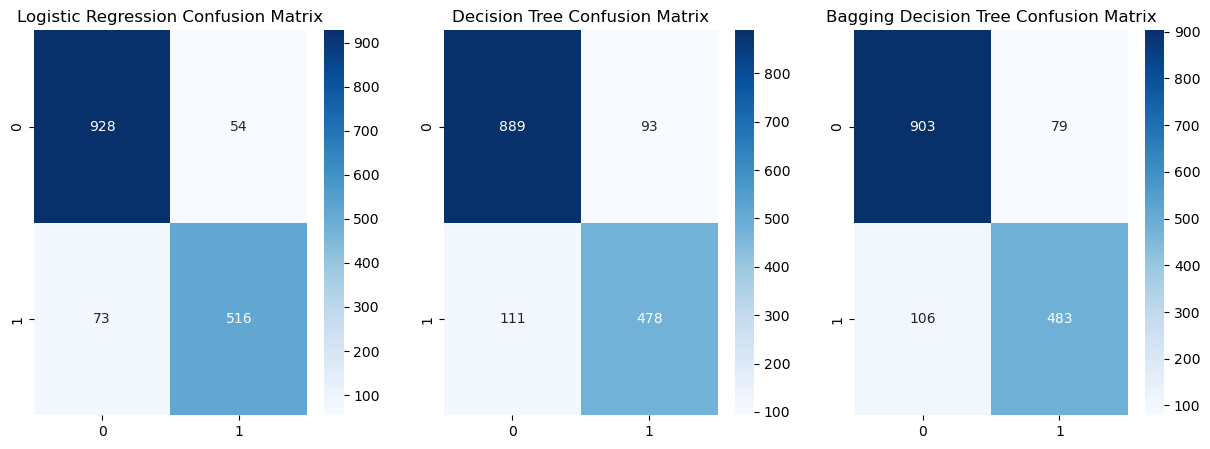

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# load questions data from CSV file
df = pd.read_csv('questions.csv')

# split data into training and testing sets
train_df = df[:1600]
test_df = df[1600:]

# vectorize training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']

# train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# train Bagging Decision Tree classifier
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                       n_estimators=10,
                                       random_state=42)
bagging_classifier.fit(X_train, y_train)

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data
y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_bagging = bagging_classifier.predict(X_test)

# calculate and print accuracy, confusion matrix, and f1 score for logistic regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("\n")

# calculate and print accuracy, confusion matrix, and f1 score for decision tree
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("\n")

# calculate and print accuracy, confusion matrix, and f1 score for bagging decision tree
print("Bagging Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("F1 Score:", f1_score(y_test, y_pred_bagging))
print("\n")

# plot confusion matrices for all three classifiers
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap="Blues", fmt='g', ax=axs[0])
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Blues", fmt='g', ax=axs[1])
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, cmap="Blues", fmt='g', ax=axs[2])
axs[0].set(title="Logistic Regression Confusion Matrix")
axs[1].set(title="Decision Tree Confusion Matrix")
axs[2].set(title="Bagging Decision Tree Confusion Matrix")
plt.show()



Logistic Regression:

Accuracy: 0.9191597708465945
Confusion Matrix:
 [[928  54]
 [ 73 516]]
F1 Score: 0.8904227782571182

Decision Tree:

Accuracy: 0.8695098663271802
Confusion Matrix:
 [[892  90]
 [115 474]]
F1 Score: 0.8222029488291415

Bagging Decision Tree:

Accuracy: 0.8822406110757479
Confusion Matrix:
 [[903  79]
 [106 483]]
F1 Score: 0.8392701998262381


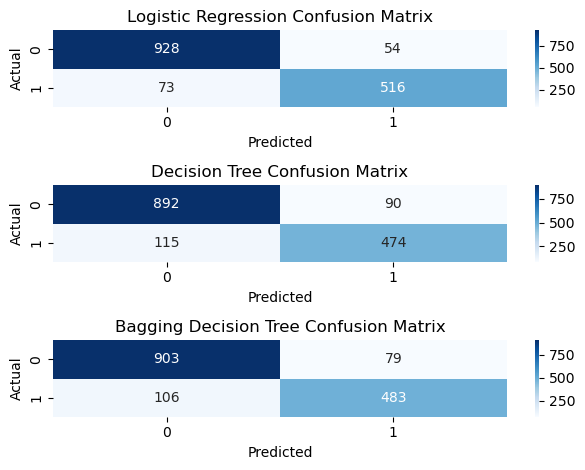

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# load questions data from CSV file
df = pd.read_csv('questions.csv')

# split data into training and testing sets
train_df = df[:1600]
test_df = df[1600:]

# vectorize training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']

# train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# create a Bagging Decision Tree classifier
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                       n_estimators=10,
                                       random_state=42)
bagging_classifier.fit(X_train, y_train)

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data for each model
models = [model, clf, bagging_classifier]
model_names = ["Logistic Regression", "Decision Tree", "Bagging Decision Tree"]
predictions = []
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    predictions.append(y_pred)
    print(f"\n{model_names[i]}:\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot(len(models), 1, i+1)
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_names[i]} Confusion Matrix')
    
# adjust layout and display plot
plt.tight_layout()
plt.show()



Naive Bayes:

Accuracy: 0.9267982176957352
Confusion Matrix:
 [[941  41]
 [ 74 515]]
F1 Score: 0.8995633187772926

Logistic Regression:

Accuracy: 0.9191597708465945
Confusion Matrix:
 [[928  54]
 [ 73 516]]
F1 Score: 0.8904227782571182

Decision Tree:

Accuracy: 0.8695098663271802
Confusion Matrix:
 [[892  90]
 [115 474]]
F1 Score: 0.8222029488291415


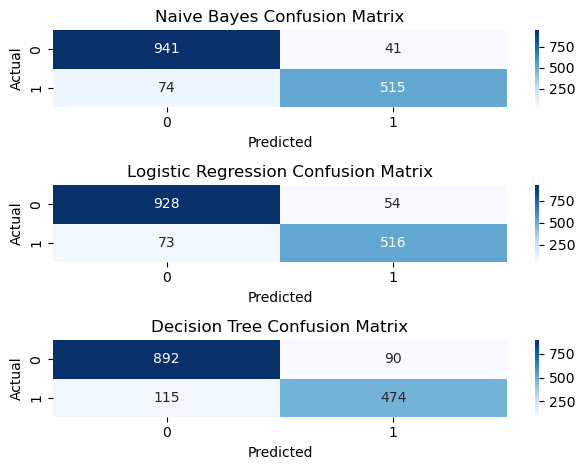

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# load questions data from CSV file
df = pd.read_csv('questions.csv')

# split data into training and testing sets
train_df = df[:1600]
test_df = df[1600:]

# vectorize training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['label']

# train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data for each model
models = [nb, lr, dt]
model_names = ["Naive Bayes", "Logistic Regression", "Decision Tree"]
predictions = []
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    predictions.append(y_pred)
    print(f"\n{model_names[i]}:\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot(len(models), 1, i+1)
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_names[i]} Confusion Matrix')
    
# adjust layout and display plot
plt.tight_layout()
plt.show()


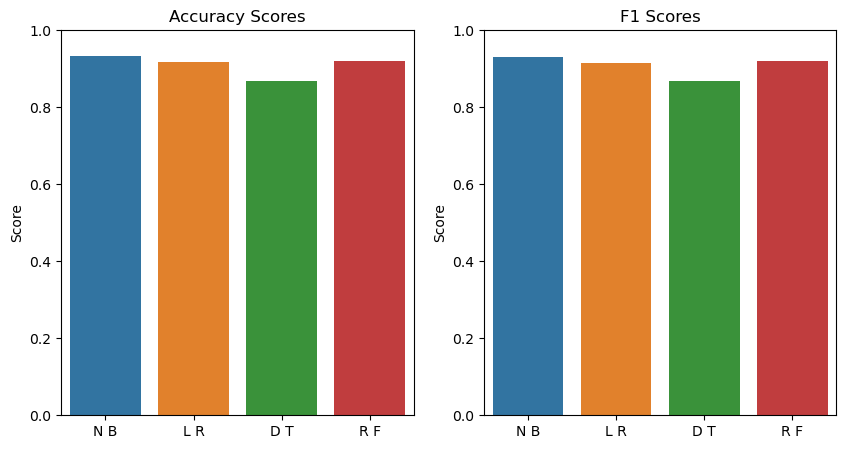

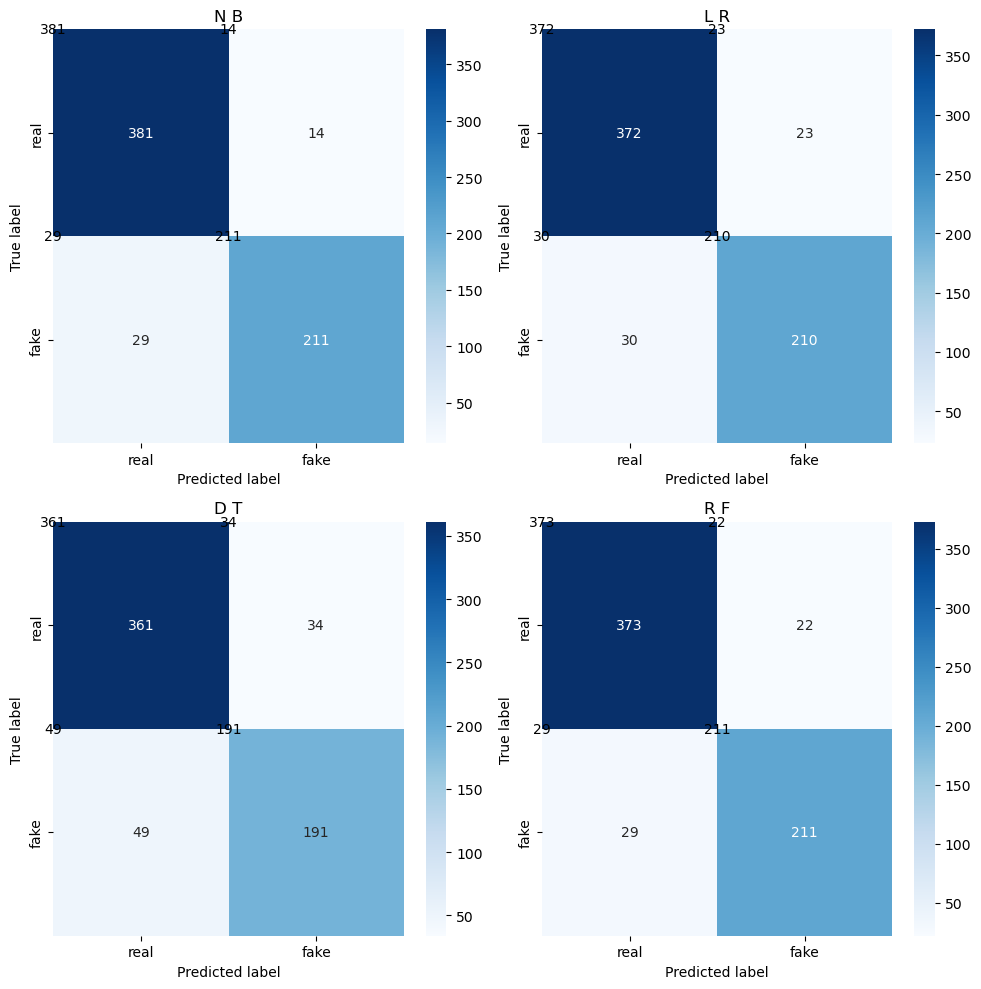

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
df = pd.read_csv('questions.csv')

# split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# vectorize training and test data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'].astype(str))
y_train = train_df['label']
X_test = vectorizer.transform(test_df['title'].astype(str))
y_test = test_df['label']

# train and evaluate classifiers
classifiers = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
classifier_names = ['N B', 'L R', 'D T', 'R F']
acc_scores = []
f1_scores = []
conf_matrices = []

for classifier in classifiers:
    clf = classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    conf_matrices.append(confusion_matrix(y_test, y_pred))

# plot accuracy and f1 scores
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x=classifier_names, y=acc_scores, ax=axs[0])
sns.barplot(x=classifier_names, y=f1_scores, ax=axs[1])
axs[0].set_title('Accuracy Scores')
axs[1].set_title('F1 Scores')
axs[0].set_ylim([0, 1])
axs[1].set_ylim([0, 1])
axs[0].set_ylabel('Score')
axs[1].set_ylabel('Score')
axs[0].tick_params(axis='x', labelrotation=0)
axs[1].tick_params(axis='x', labelrotation=0)

# plot confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    sns.heatmap(conf_matrices[i], annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(classifier_names[i])
    ax.xaxis.set_ticklabels(['real', 'fake'])
    ax.yaxis.set_ticklabels(['real', 'fake'])
    for j in range(2):
        for k in range(2):
            ax.text(k, j, str(conf_matrices[i][j, k]), horizontalalignment='center', verticalalignment='center')
    ax.figure.tight_layout()
plt.show()


In [10]:
#For Naive Bayes classifier:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data
y_pred = model.predict(X_test)

# calculate and print accuracy, confusion matrix, precision, recall, f1 macro, f1 micro, and macro mae
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
mae_macro = (1 - f1_macro) / 2

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Macro:", f1_macro)
print("F1 Micro:", f1_micro)
print("Macro MAE:", mae_macro)


Accuracy: 0.9191597708465945
Confusion Matrix:
 [[928  54]
 [ 73 516]]
Precision: 0.9052631578947369
Recall: 0.8760611205432938
F1 Macro: 0.9131892005254325
F1 Micro: 0.9191597708465945
Macro MAE: 0.043405399737283745


In [11]:
#For Logistic Regression classifier:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data
y_pred = model.predict(X_test)

# calculate and print accuracy, confusion matrix, precision, recall, f1 macro, f1 micro, and macro mae
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
mae_macro = (1 - f1_macro) / 2

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Macro:", f1_macro)
print("F1 Micro:", f1_micro)
print("Macro MAE:", mae_macro)


Accuracy: 0.9191597708465945
Confusion Matrix:
 [[928  54]
 [ 73 516]]
Precision: 0.9052631578947369
Recall: 0.8760611205432938
F1 Macro: 0.9131892005254325
F1 Micro: 0.9191597708465945
Macro MAE: 0.043405399737283745


In [12]:
#For Decision Tree classifier:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# vectorize test data
X_test = vectorizer.transform(test_df['title'])
y_test = test_df['label']

# predict on test data
y_pred = clf.predict(X_test)

# calculate and print accuracy, confusion matrix, precision, recall, f1 macro, f1 micro, and macro mae
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
mae_macro = (1 - f1_macro) / 2

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Macro:", f1_macro)
print("F1 Micro:", f1_micro)
print("Macro MAE:", mae_macro)


Accuracy: 0.8612348822406111
Confusion Matrix:
 [[894  88]
 [130 459]]
Precision: 0.8391224862888482
Recall: 0.7792869269949066
F1 Macro: 0.8497123067417465
F1 Micro: 0.861234882240611
Macro MAE: 0.07514384662912676


In [4]:
import pandas as pd

# Load data from CSV file
df = pd.read_csv("questions.csv")

# Print number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Print column names
print("Column names:", df.columns.tolist())

# Check if label column has only binary values (0 or 1)
label_counts = df["label"].value_counts()
if len(label_counts) == 2 and 0 in label_counts.index and 1 in label_counts.index:
    print("Label column has only binary values (0 or 1)")
else:
    print("Label column does not have only binary values")
    
# Calculate the percentage of correct labels
correct_labels = df[(df["title"].str.endswith("?") & (df["label"] == 1)) | (~df["title"].str.endswith("?") & (df["label"] == 0))]
percent_correct = 100 * correct_labels.shape[0] / df.shape[0]
print("Percentage of correct labels:", percent_correct)


Number of rows: 3171
Number of columns: 2
Column names: ['title', 'label']
Label column has only binary values (0 or 1)
Percentage of correct labels: 36.9284137496058
